# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.4 huggingface_hub==0.34.0 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.7/558.7 kB 38.3 MB/s eta 0:00:00


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/UTAustin/Module7/SuperKart.csv'
df = pd.read_csv(path)

# **Data Overview**

#### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [ ]:
df.head(5)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


- As displayed, the dataset has a total of 11 independent features and 1 dependent feature.
- The dataset consists of 7 features of type object, 4 features of type float64 and 1 feature of type int64.

#### Dataset Shape

In [ ]:
df.shape

(8763, 12)

- The dataset consists of 12 features and 8763 rows

#### Dataset Stistical Summary

In [ ]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
Product_Weight,8763.0,12.653792,2.217320,4.000,11.150,12.660,14.180,22.000
Product_Allocated_Area,8763.0,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_MRP,8763.0,147.032539,30.694110,31.000,126.160,146.740,167.585,266.000
Store_Establishment_Year,8763.0,2002.032751,8.388381,1987.000,1998.000,2009.000,2009.000,2009.000
Product_Store_Sales_Total,8763.0,3464.003640,1065.630494,33.000,2761.715,3452.340,4145.165,8000.000


- The statistical summary was generated to identify the values present in the dataset, inclusive of the min, max and std values.

# **Exploratory Data Analysis (EDA)**

### Reusable Functions

In [ ]:
# Univariate Analysis Reuseable Functions
def univariate_distribution_analysis(data, predictor, title_prefix="Feature"): # Distribution of data with Outlier analysis
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(ax=axes[0], data=data, x=predictor, kde=True) # Plotting the Kernel Density Curve to identify the distribution of the dataset
    axes[0].set_title(f'{title_prefix} - {predictor} (Histogram)')
    sns.boxplot(ax=axes[1], data=data, x=predictor)
    axes[1].set_title(f'{title_prefix} - {predictor} (Box Plot)')
    plt.tight_layout()
    plt.show()


def plot_categorical_distribution(dataframe, column, title): # Distribution visualization of categorical data in the dataset
  data = dataframe[column].value_counts().sort_values(ascending=False)
  plt.figure(figsize=(10, 5))
  # plt.figure(figsize=(25, 5))
  plot = sns.barplot(x=data.index, y=data.values, hue=data, palette='Paired')
  plot.legend(loc='upper left', prop={'size': 8})
  plot.set_title(title)
  plot.tick_params(axis='x', rotation=0)
  plt.show()


def bivariate_analysis(data, predictor, target):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Scatter plot
    sns.scatterplot(
        data=data,
        x=predictor,
        y=target,
        alpha=0.6,
        ax=axs[0]
    )
    axs[0].set_title(f"{predictor} vs {target}")

    # Scatter with regression line
    sns.regplot(
        data=data,
        x=predictor,
        y=target,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red"},
        ax=axs[1]
    )
    axs[1].set_title(f"{predictor} vs {target} (Regression)")

    # Correlation heatmap (single value)
    corr = data[[predictor, target]].corr()
    sns.heatmap(
        corr,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        ax=axs[2]
    )
    axs[2].set_title("Correlation")

    plt.tight_layout()
    plt.show()



def bivariate_cat_num(data, predictor, target):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Boxplot
    sns.boxplot(
        data=data,
        x=predictor,
        y=target,
        ax=axs[0],
        showfliers=True
    )
    axs[0].set_title(f"{target} by {predictor}")
    axs[0].tick_params(axis="x", rotation=45)

    # Boxplot without outliers
    sns.boxplot(
        data=data,
        x=predictor,
        y=target,
        ax=axs[1],
        showfliers=False
    )
    axs[1].set_title(f"{target} by {predictor} (No Outliers)")
    axs[1].tick_params(axis="x", rotation=45)

    # Mean comparison
    sns.barplot(
        data=data,
        x=predictor,
        y=target,
        estimator="mean",
        errorbar=None,
        ax=axs[2]
    )
    axs[2].set_title(f"Mean {target} by {predictor}")
    axs[2].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### **Numerical Analysis**

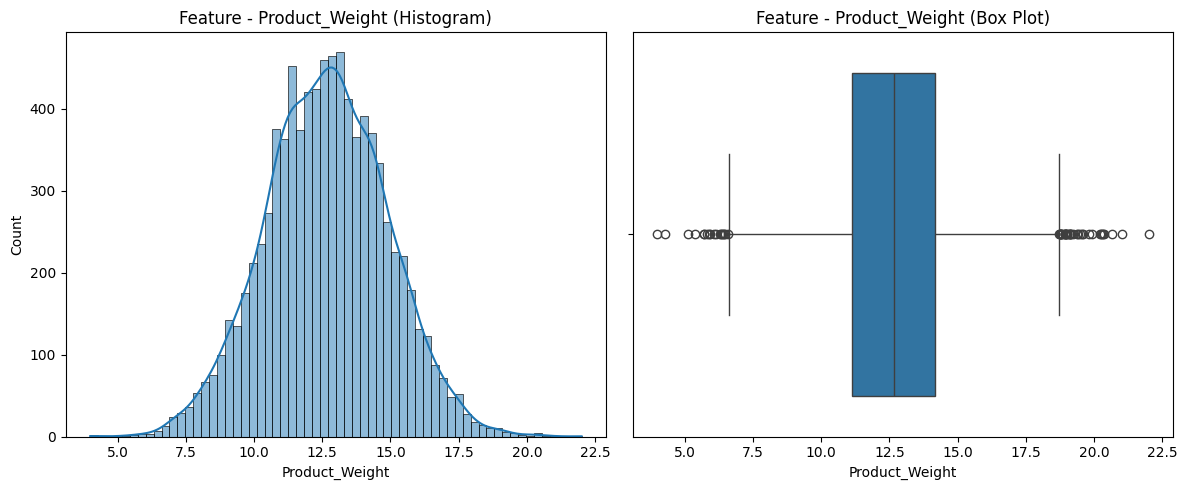

In [ ]:
univariate_distribution_analysis(df, 'Product_Weight')

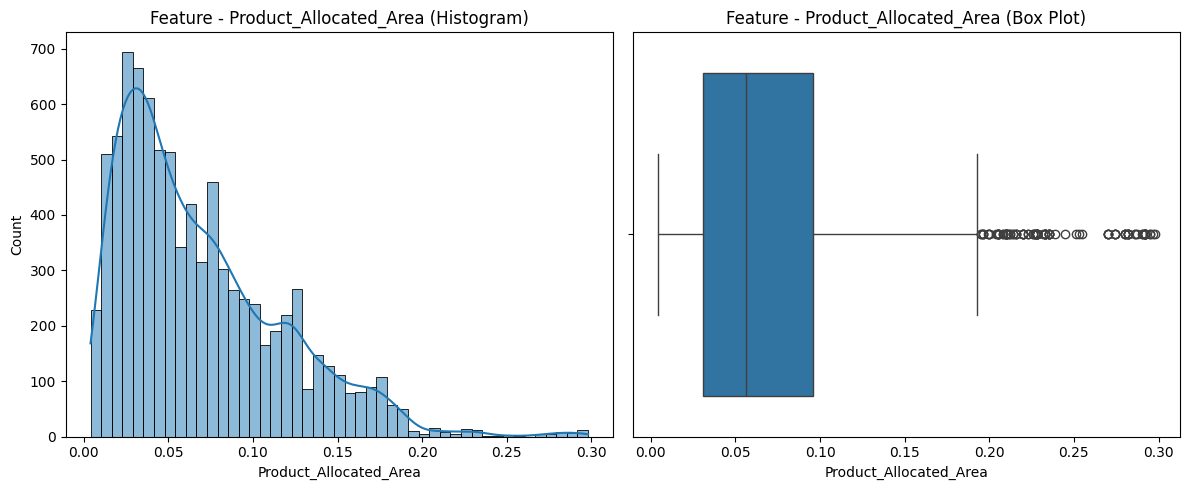

In [ ]:
univariate_distribution_analysis(df, 'Product_Allocated_Area')

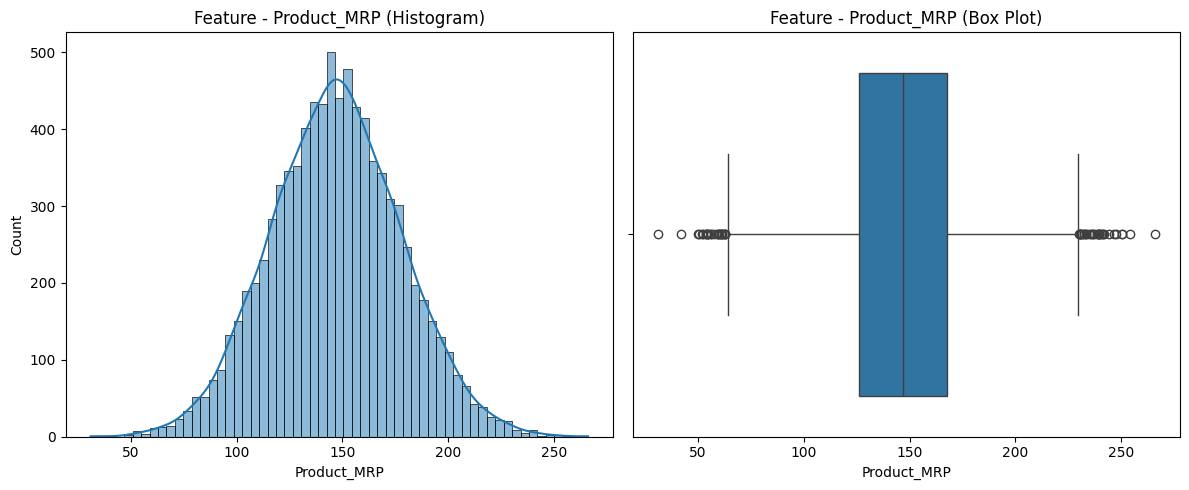

In [ ]:
univariate_distribution_analysis(df, 'Product_MRP')

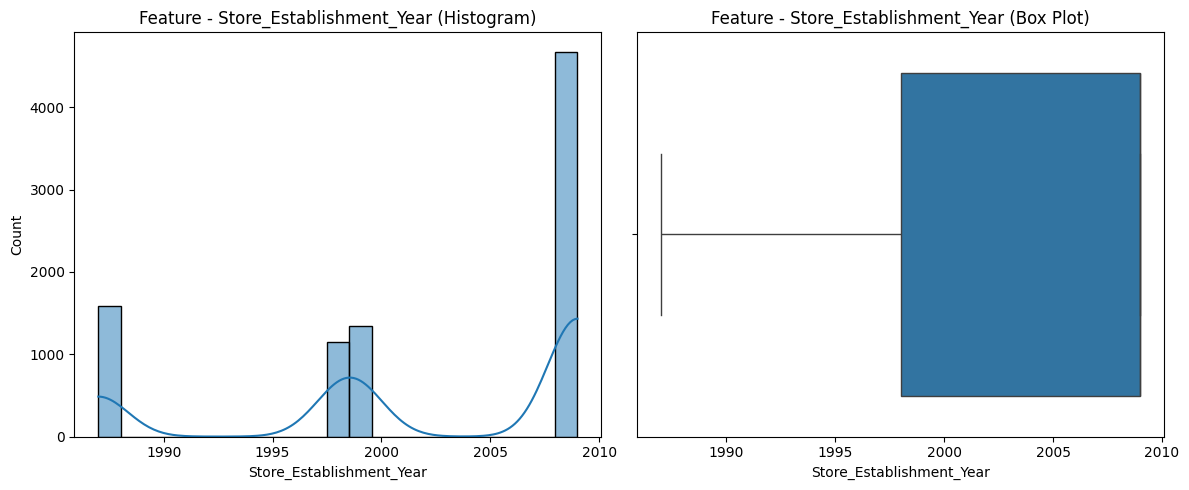

In [ ]:
univariate_distribution_analysis(df, 'Store_Establishment_Year')

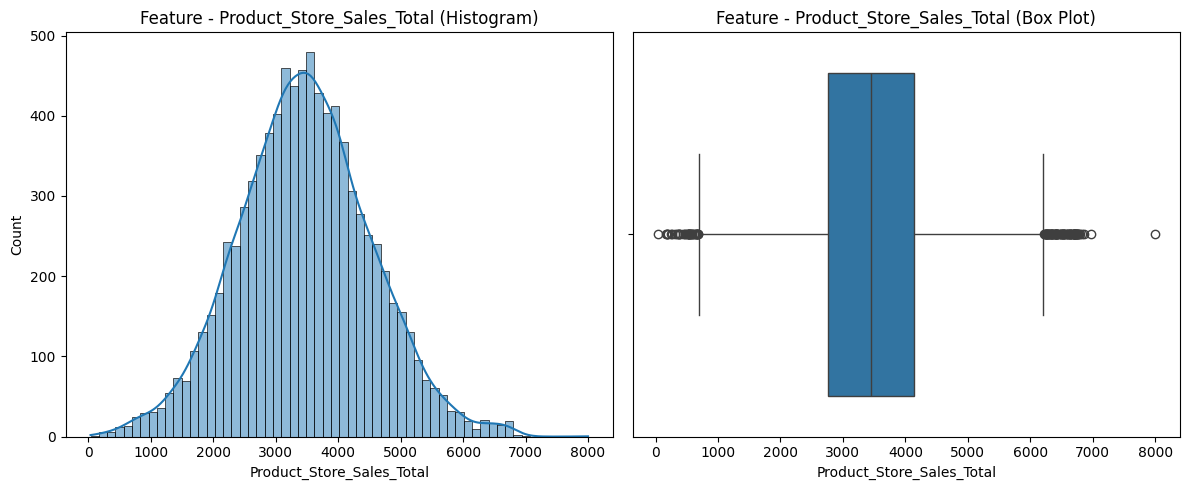

In [ ]:
univariate_distribution_analysis(df, 'Product_Store_Sales_Total')

**Observations**

- As per the histograms, all the features follow a normal distribution except the `Product_Allocated_Area` indicating the presence of outliers in the dataset.
- As depicted in the box plots, every feature consists of a set number of outliers, however, these will not be treated as they are real-world representations.

#### **Categorical Analysis**

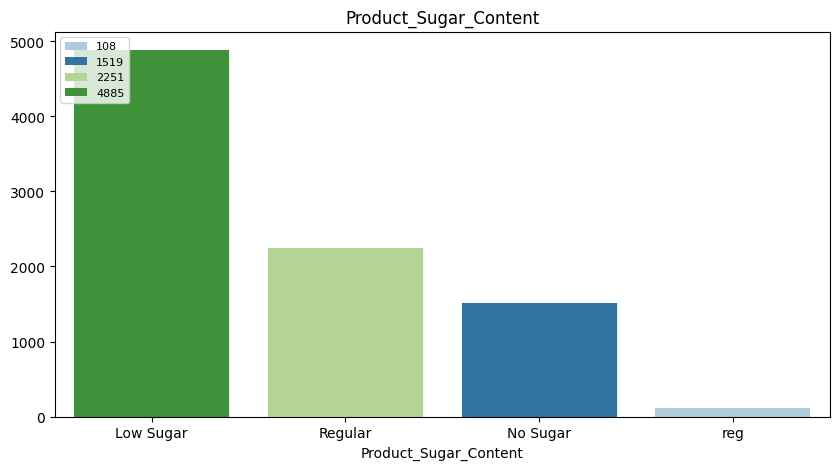

In [ ]:
plot_categorical_distribution(df, 'Product_Sugar_Content', 'Product_Sugar_Content')

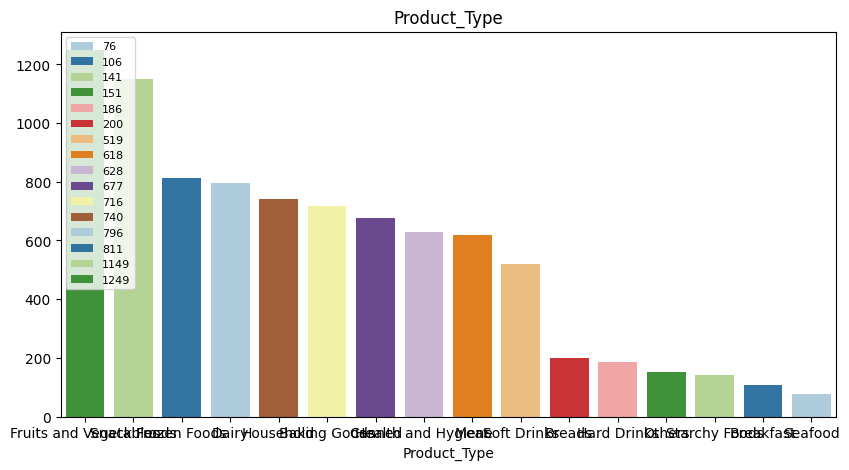

In [ ]:
plot_categorical_distribution(df, 'Product_Type', 'Product_Type')

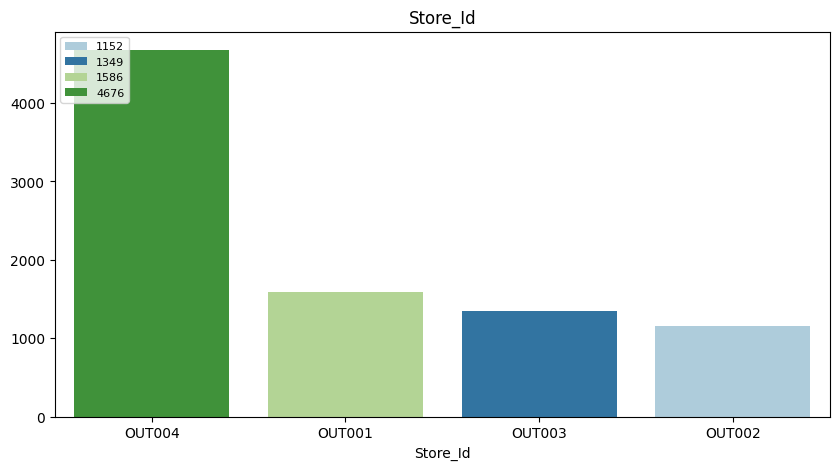

In [ ]:
plot_categorical_distribution(df, 'Store_Id', 'Store_Id')

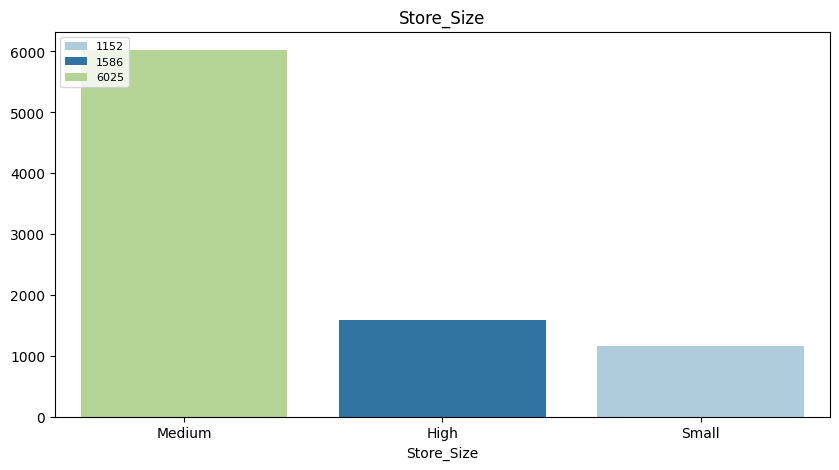

In [ ]:
plot_categorical_distribution(df, 'Store_Size', 'Store_Size')

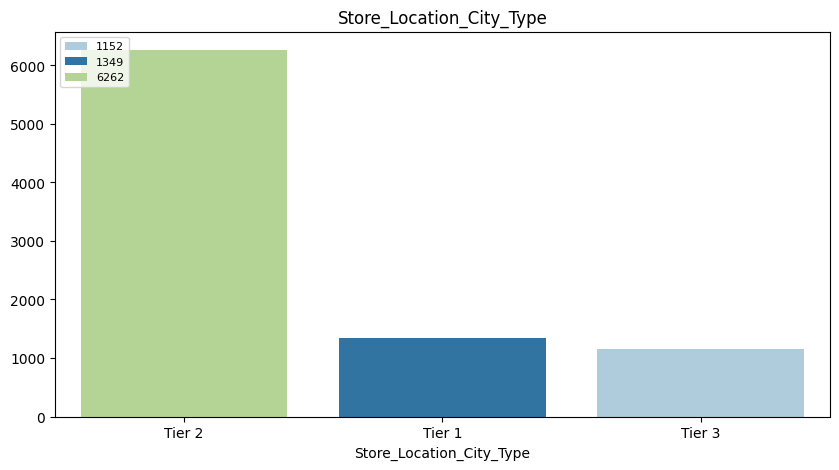

In [ ]:
plot_categorical_distribution(df, 'Store_Location_City_Type', 'Store_Location_City_Type')

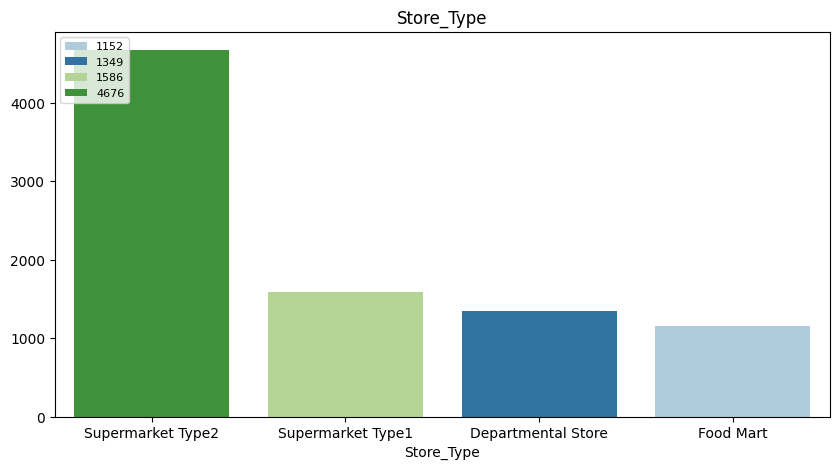

In [ ]:
plot_categorical_distribution(df, 'Store_Type', 'Store_Type')

**Observations**

- As identified in the above Bar Plots for the categorical data, there is a drastic differences between the categories present in the dataset.
- Despite the differences, the data will not be oversampled or undersampled due to the preservation of the orignality of the dataset, however, if required in the future, re-sampling techniques may be considered.

## Bivariate Analysis

#### **Numerical Analysis**

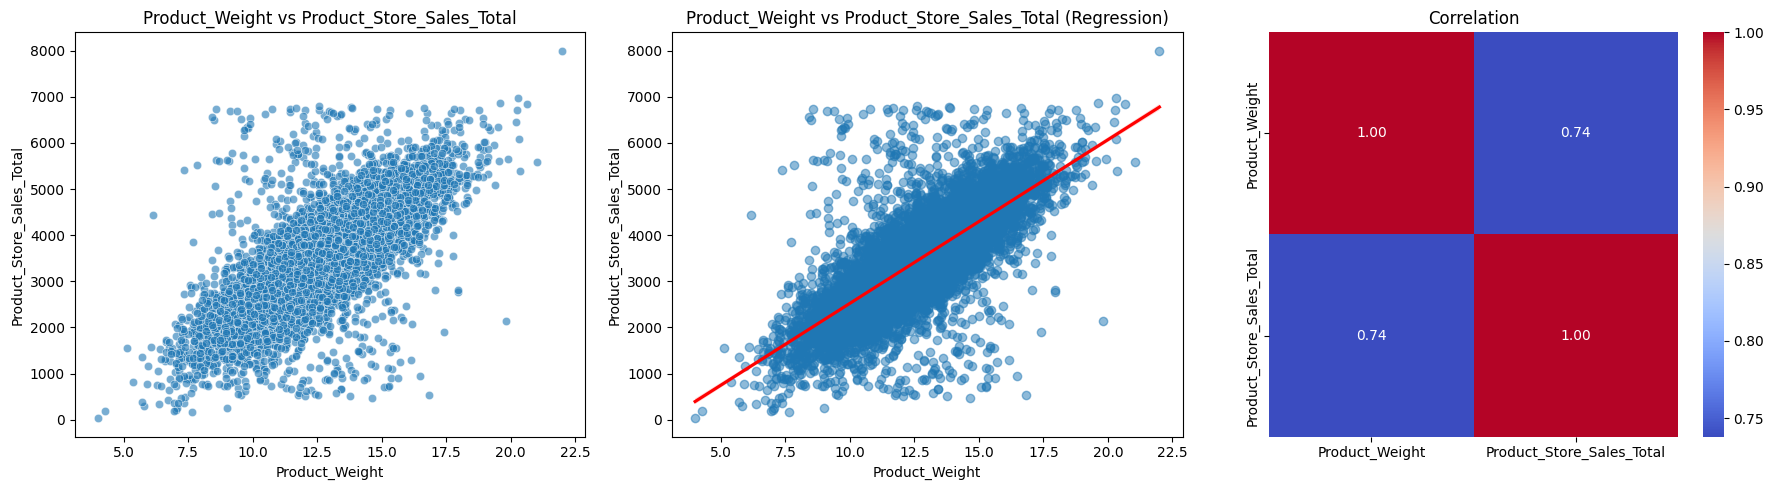

In [ ]:
bivariate_analysis(df, 'Product_Weight', 'Product_Store_Sales_Total')

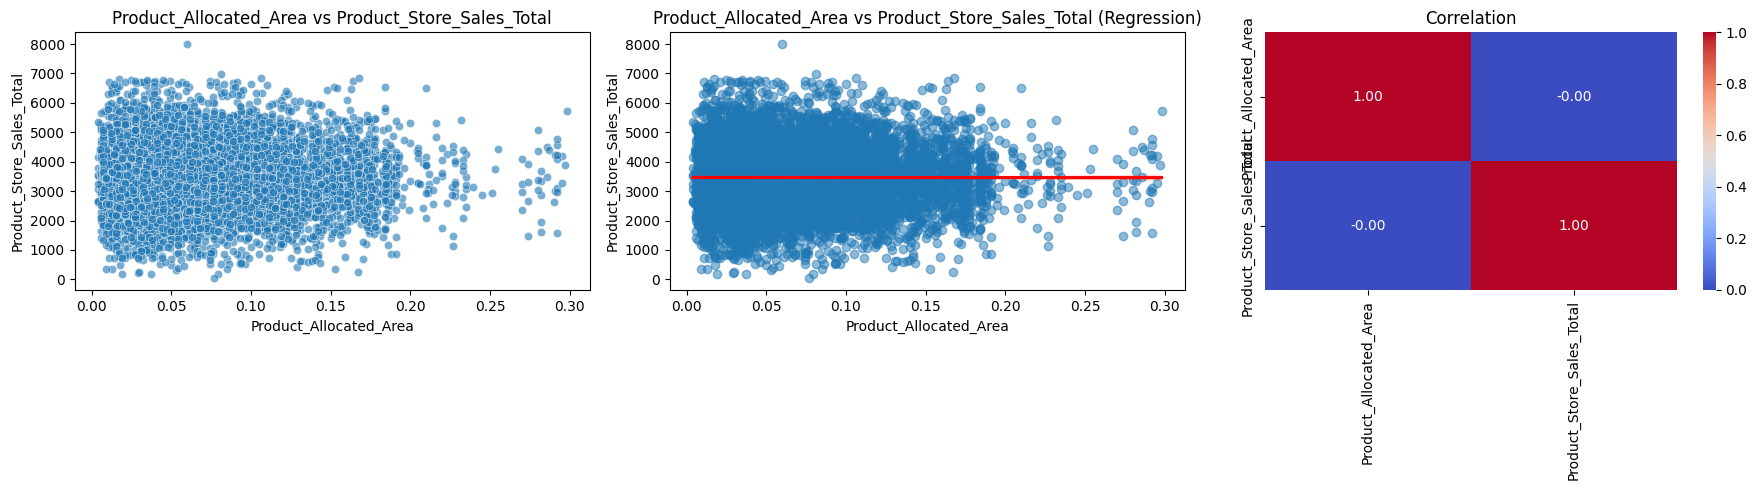

In [ ]:
bivariate_analysis(df, 'Product_Allocated_Area', 'Product_Store_Sales_Total')

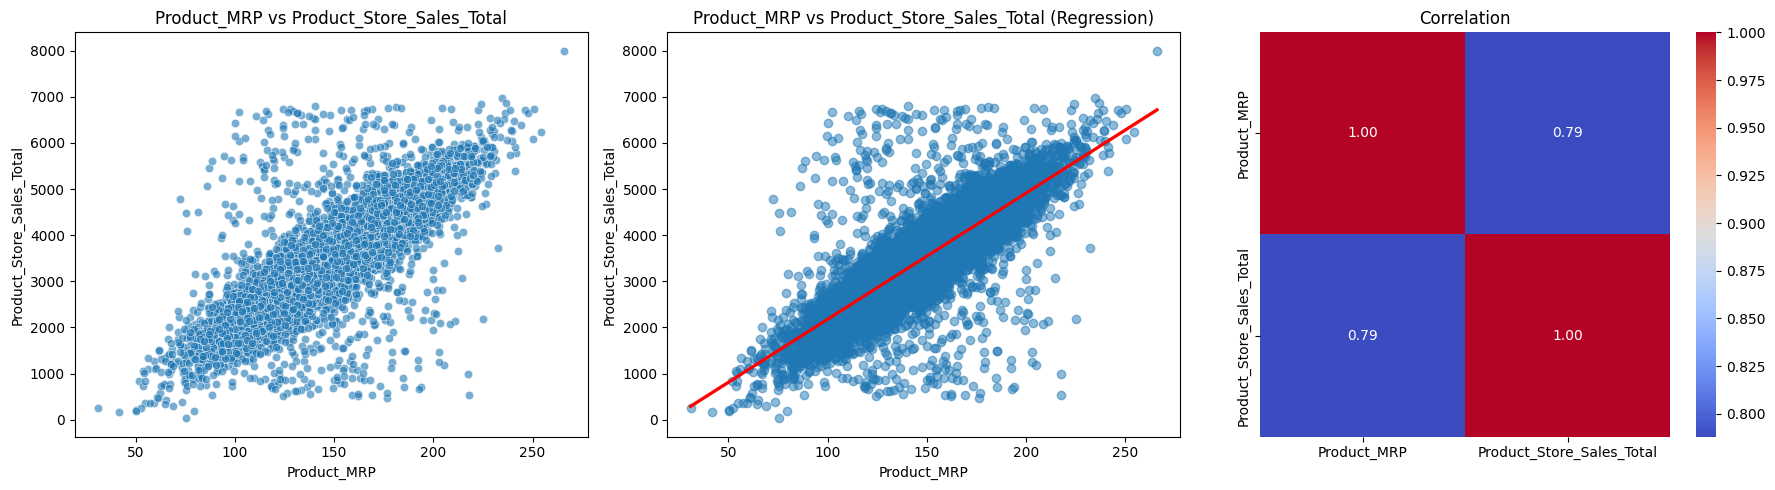

In [ ]:
bivariate_analysis(df, 'Product_MRP', 'Product_Store_Sales_Total')

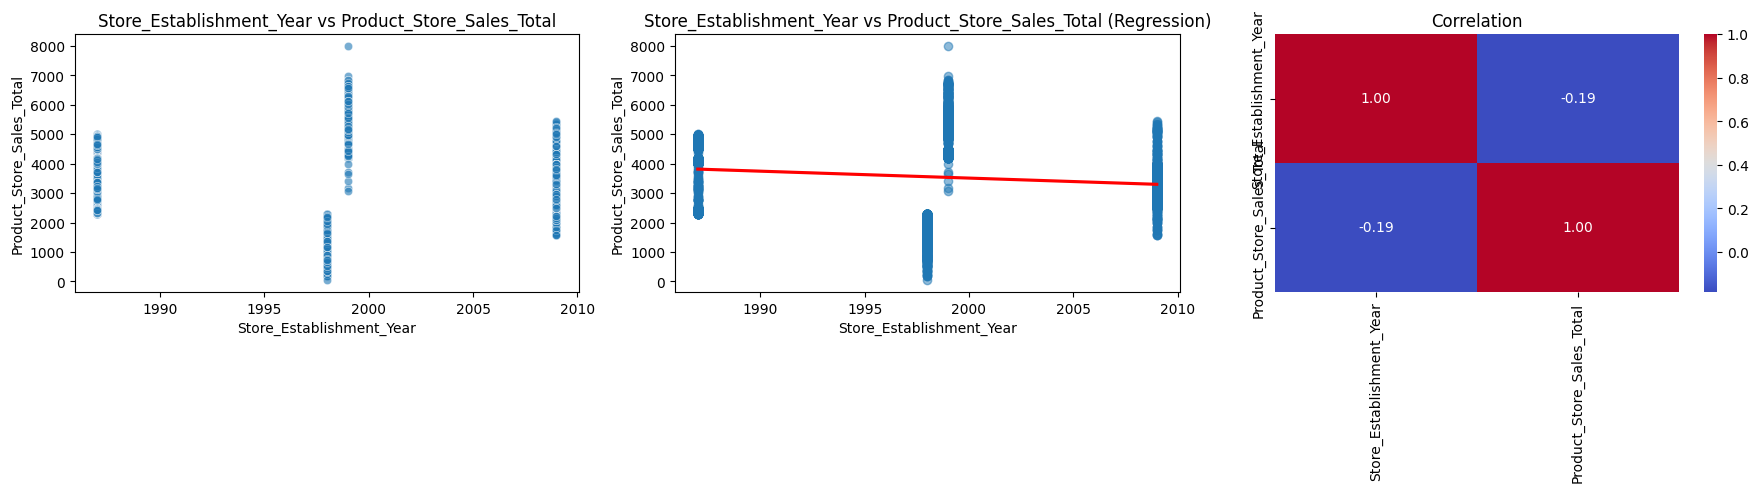

In [ ]:
bivariate_analysis(df, 'Store_Establishment_Year', 'Product_Store_Sales_Total')

- As identified in the scatter plots for the numerical data with the target value `Product_Store_Sales_Total`, both `Product_Weight` and `Product_MRP` have a positive correlation.
- `Product_Allocated_Area` indicates that there is no correlation.
- `Store_Establishment_Year` indicates there is a negative correlation with the target variable.

#### **Categorical Data**

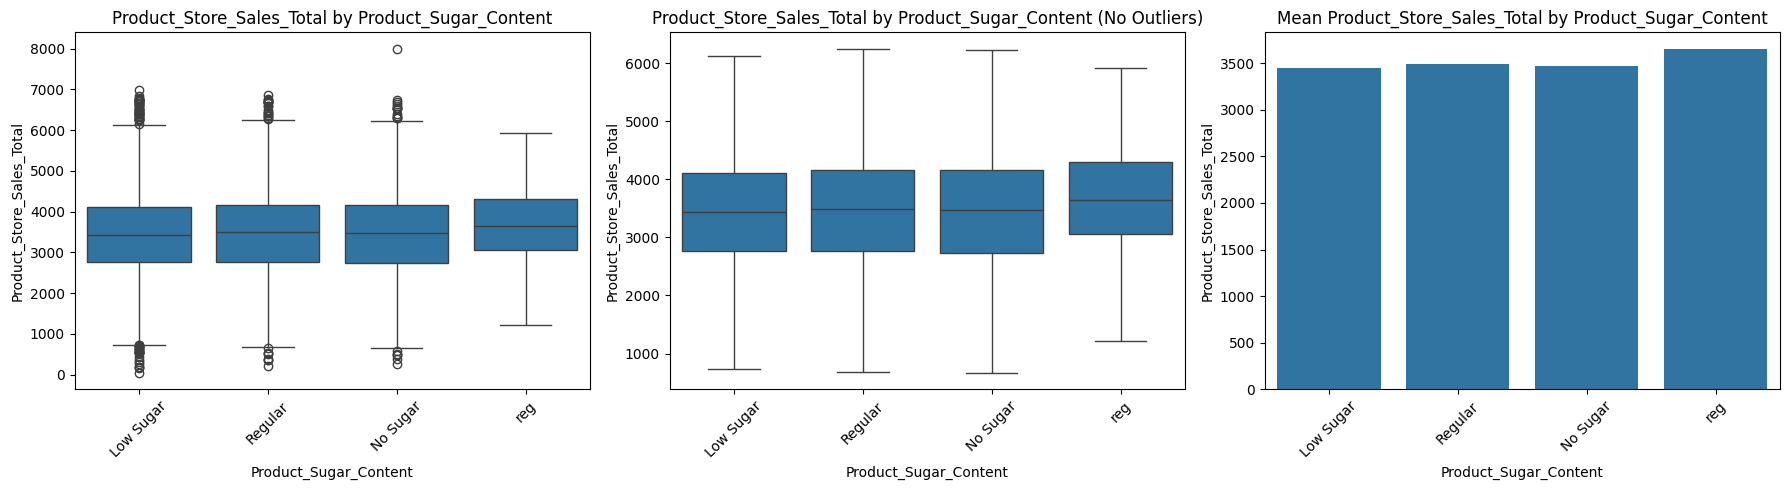

In [ ]:
bivariate_cat_num(df, 'Product_Sugar_Content', 'Product_Store_Sales_Total')

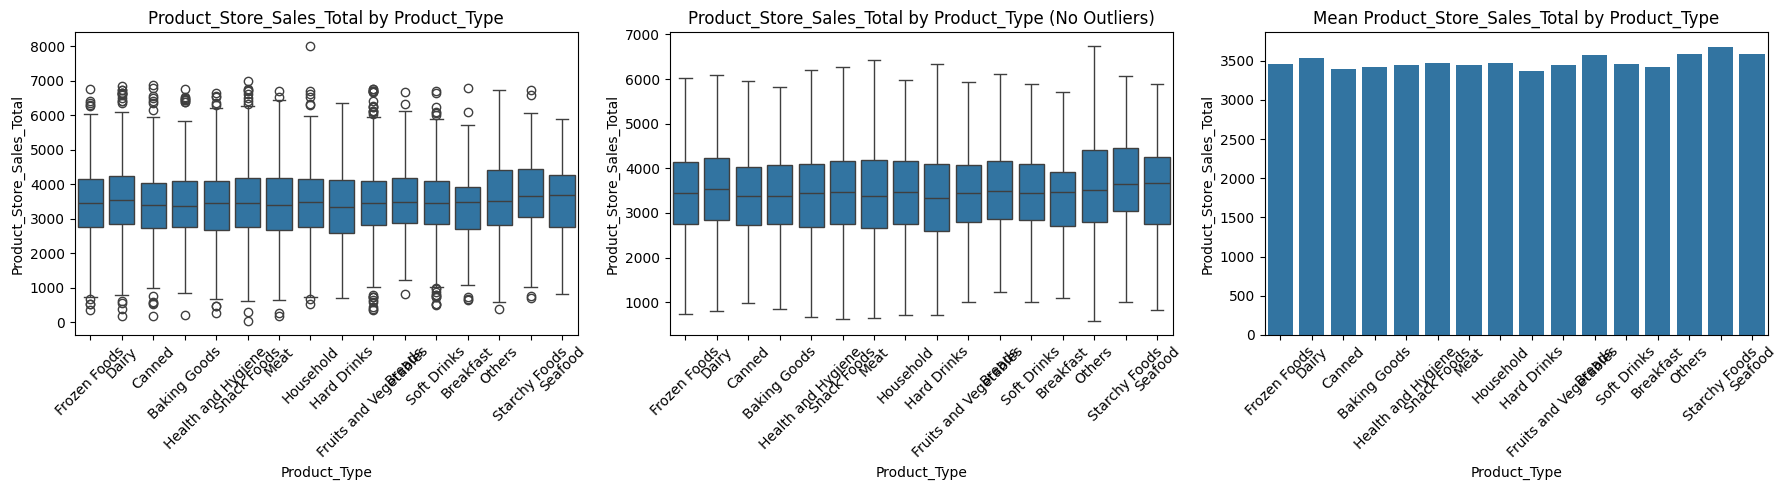

In [ ]:
bivariate_cat_num(df, 'Product_Type', 'Product_Store_Sales_Total')

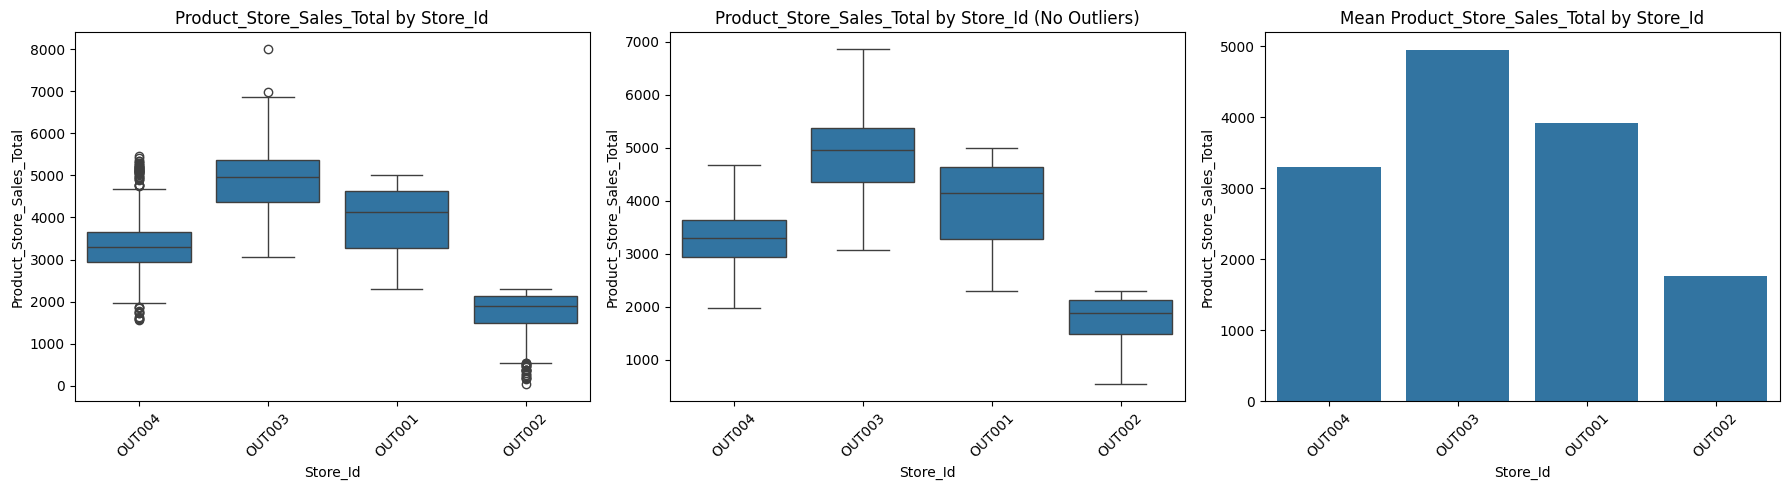

In [ ]:
bivariate_cat_num(df, 'Store_Id', 'Product_Store_Sales_Total')

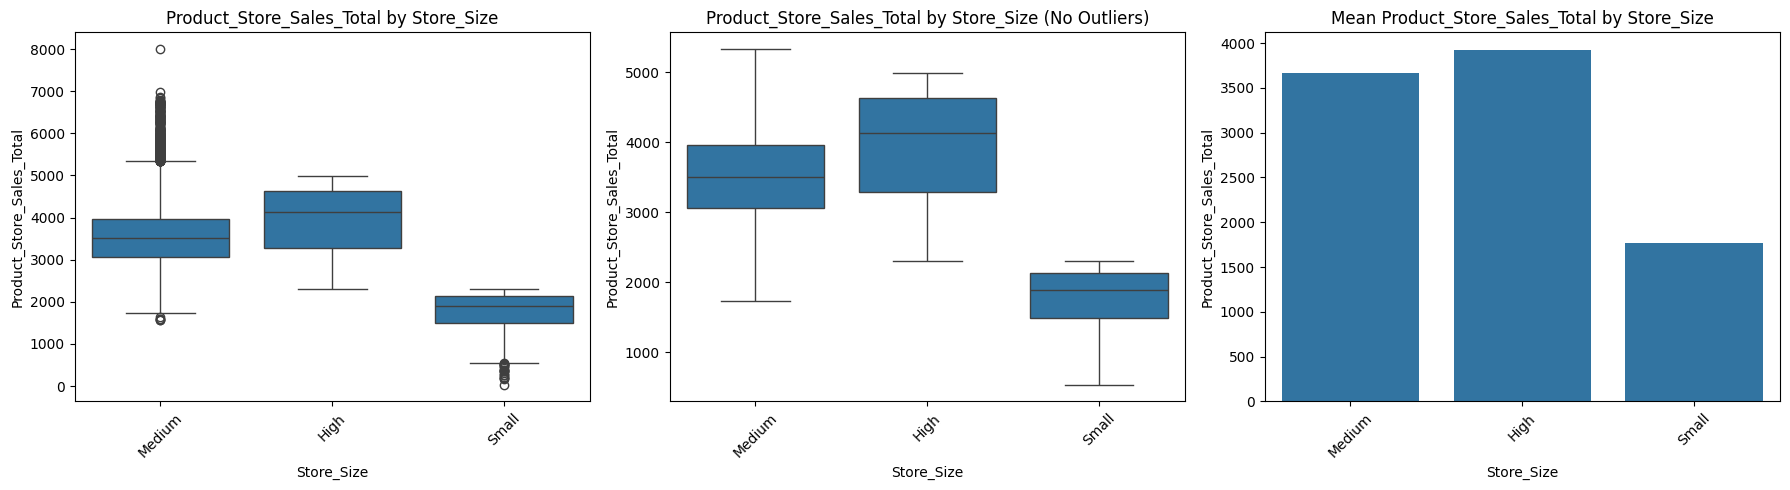

In [ ]:
bivariate_cat_num(df, 'Store_Size', 'Product_Store_Sales_Total')

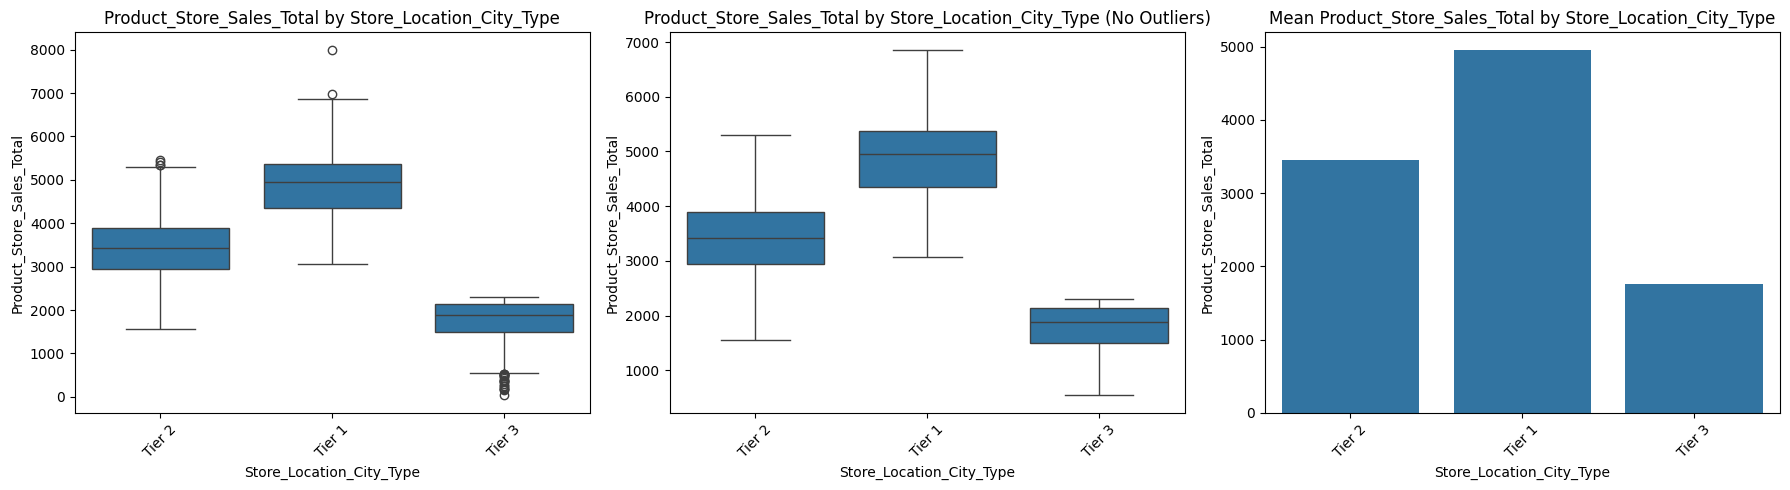

In [ ]:
bivariate_cat_num(df, 'Store_Location_City_Type', 'Product_Store_Sales_Total')

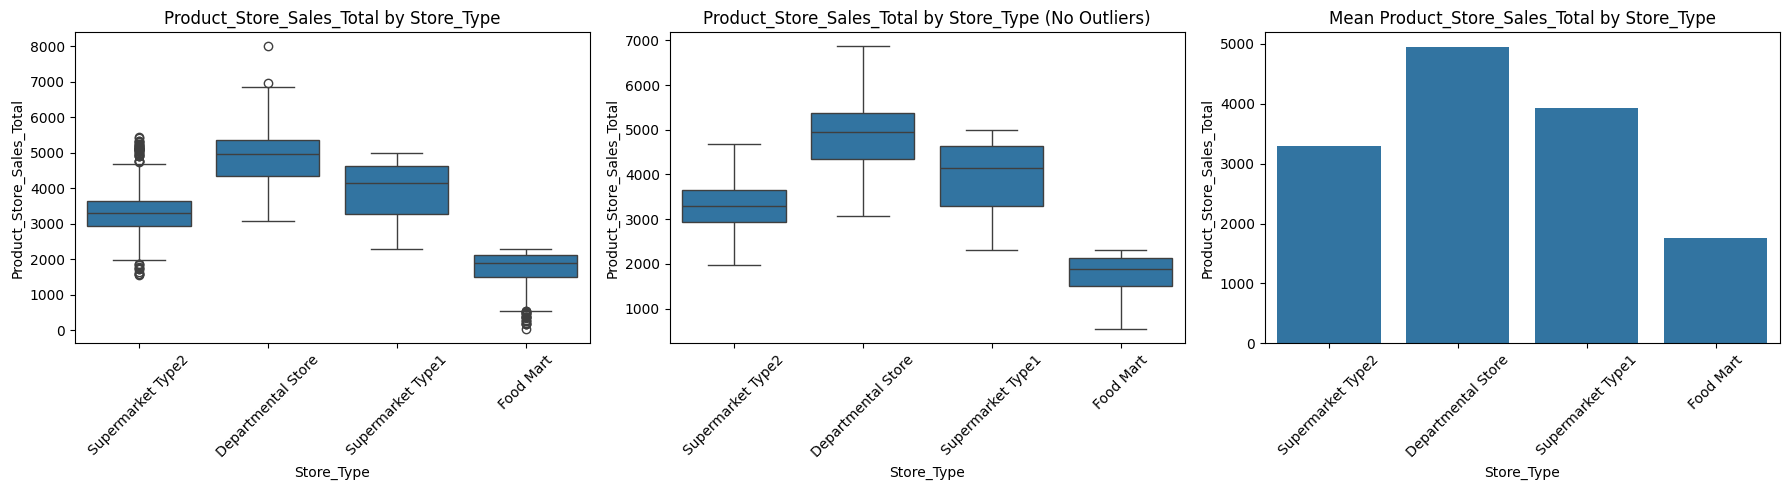

In [ ]:
bivariate_cat_num(df, 'Store_Type', 'Product_Store_Sales_Total')

- As depicted in the box plots, outliers are present in the dataset but as mentioned previously, these will not be treated due to the dataset's originality preservation.

## Multivariate Analysis

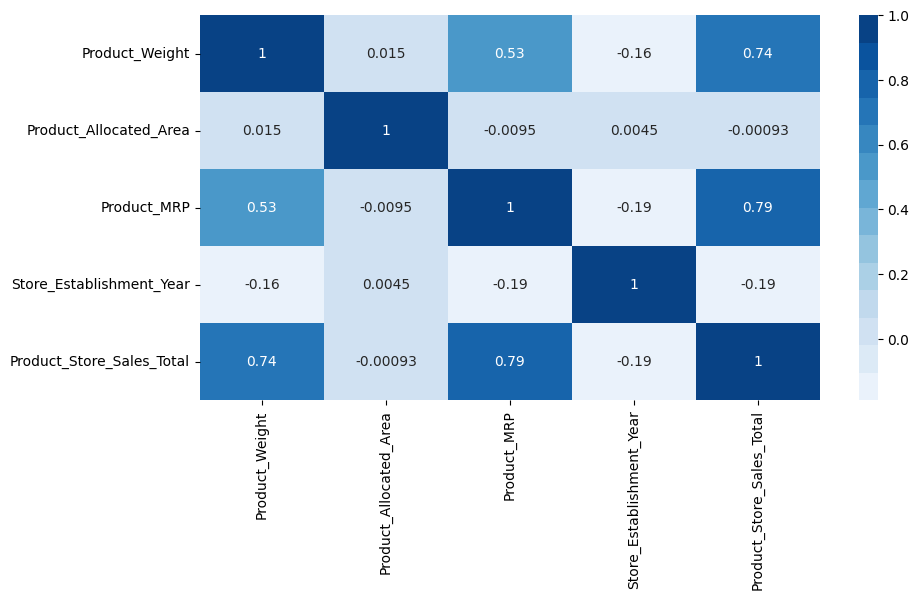

In [ ]:
num_var = df.dtypes[df.dtypes != 'object'].index
plt.figure(figsize=(10, 5))
sns.heatmap(data=df[num_var].corr(), annot=True, cmap=sns.color_palette("Blues",14))
plt.show()

- The features which are highly positive correlated are `Product_MRP` and `Product_Store_Sales_Total` which is 0.79.
- The second set of features which are highly positiely correlated are `Product_Store_Sales_Total` and `Product_Weight` which is 0.74.
- The features which have the highest negative correlation are `Product_Allocated_Area` and `Product_MRP` with -0.0095.

# **Data Preprocessing**

**Dropping irrelevant columns**

In [ ]:
df = df.drop('Product_Id', axis=1)

In [ ]:
df = df.drop('Store_Id', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Weight             8763 non-null   float64
 1   Product_Sugar_Content      8763 non-null   object 
 2   Product_Allocated_Area     8763 non-null   float64
 3   Product_Type               8763 non-null   object 
 4   Product_MRP                8763 non-null   float64
 5   Store_Establishment_Year   8763 non-null   int64  
 6   Store_Size                 8763 non-null   object 
 7   Store_Location_City_Type   8763 non-null   object 
 8   Store_Type                 8763 non-null   object 
 9   Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 684.7+ KB


- As these values contain only unique values, these will be dropped respectively.

**Checking the dataframe for missing values**

In [ ]:
df.isnull().sum()

,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0
Store_Type,0
Product_Store_Sales_Total,0


- None of the features as derived from the dataset have missing values.

**Checking the dataframe for duplicated values**

In [ ]:
df.duplicated().sum()

np.int64(0)

- As identified, there are no missing values in the dataset.

**Converting `Reg` to `Regular`**

In [ ]:
df.Product_Sugar_Content.replace(to_replace=["reg"], value=["Regular"], inplace=True)
df.Product_Sugar_Content.value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


- Converting 'Reg' to 'Regular' to improve consistency among the `Product_Sugar_Content` values.

**Identifying Store Age in Years**

In [ ]:
df["Store_Age_Years"] = 2025 - df.Store_Establishment_Year
df = df.drop('Store_Establishment_Year', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Weight             8763 non-null   float64
 1   Product_Sugar_Content      8763 non-null   object 
 2   Product_Allocated_Area     8763 non-null   float64
 3   Product_Type               8763 non-null   object 
 4   Product_MRP                8763 non-null   float64
 5   Store_Size                 8763 non-null   object 
 6   Store_Location_City_Type   8763 non-null   object 
 7   Store_Type                 8763 non-null   object 
 8   Product_Store_Sales_Total  8763 non-null   float64
 9   Store_Age_Years            8763 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 684.7+ KB


- The `Store_Age_Years` was extratced from the `Store_Establishment_Year` as this allows viewers to identify how long a store has operated.

**Outlier Analysis**

In [ ]:
def outlier_analysis_loop(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_results = []

    for col in numeric_cols:
        # Calculate quartiles and IQR for each column
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Calculate upper/lower bounds for further calculations
        lower_fence = q1 - 1.5 * iqr
        upper_fence = q3 + 1.5 * iqr

        # Find outliers (Count and Percentage of outliers present in each feature)
        outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100

        outlier_results.append({
            'Feature': col,
            'Lower_Bound': f"{lower_fence:.2f}",
            'Upper_Bound': f"{upper_fence:.2f}",
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': f"{outlier_percentage:.2f}%",
        })

    return pd.DataFrame(outlier_results)

outlier_analysis_loop(df)

,Feature,Lower_Bound,Upper_Bound,Outlier_Count,Outlier_Percentage
0,Product_Weight,6.61,18.72,54,0.62%
1,Product_Allocated_Area,-0.07,0.19,104,1.19%
2,Product_MRP,64.02,229.72,57,0.65%
3,Product_Store_Sales_Total,686.54,6220.34,119,1.36%
4,Store_Age_Years,-0.50,43.50,0,0.00%


- As identified in the table, the numeric features indicate the presence of outliers, however, the outliers will be not be treated due to the preservation of the dataset's originality.


**Train and Test split**

In [ ]:
X = df.drop('Product_Store_Sales_Total', axis=1)
y = df['Product_Store_Sales_Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print("X Train Shape")
print(X_train.shape)

print("\nX Test Shape")
print(X_test.shape)

print("\nY Train Shape")
print(y_train.shape)

print("\nY Test Shape")
print(y_test.shape)

X Train Shape
(6134, 9)

X Test Shape
(2629, 9)

Y Train Shape
(6134,)

Y Test Shape
(2629,)


- The data was split wiht 30% for testing and 70% for training.
- There are 6134 samples for training and 2629 samples for testing with 9 features for both train and test sets.

**Pre-Processing Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Feature groups
nominal_features = [
    "Store_Type",
    "Product_Type"
]

ordinal_features = [
    "Product_Sugar_Content",
    "Store_Size",
    "Store_Location_City_Type"
]

# Ordinal Categories
ordinal_categories = [
    ["Low Sugar", "Regular", "No Sugar", "reg"],
    ["Small", "Medium", "High"],
    ["Tier 1", "Tier 2", "Tier 3"]
]

# Pipelines
nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=ordinal_categories))
])

# Preprocessor
preprocessor = ColumnTransformer([
    ("nominal", nominal_pipeline, nominal_features),
    ("ordinal", ordinal_pipeline, ordinal_features)
])

# Fit / Transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)


- The preprocessing pipeline was built for encoding nominal and ordinal values before deploying the model.

# **Model Building**

**Define functions for Model Evaluation**

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

**Random Forest Regressor - Model Training Pipeline**

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_pipeline = make_pipeline(preprocessor, rf_model)

In [ ]:
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Store_Type',
                                                   'Product_Type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Sugar',
                                                                                               'Regular',
                                                                                               'No '
                                                                                               'Sugar',
                                                                                               'reg'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Store_Type',
                                                   'Product_Type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Sugar',
                                                                                               'Regular',
                                                                                               'No '
                                                                                               'Sugar',
                                                                                               'reg'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
rf_estimator_model_train_perf = model_performance_regression(rf_pipeline, X_train,y_train)
print("Training performance \n")
rf_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,596.514143,468.65614,0.68799,0.687531,0.173356


In [ ]:
rf_estimator_model_test_perf = model_performance_regression(rf_pipeline, X_test,y_test)
print("Testing performance \n")
rf_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,608.933282,476.603617,0.670035,0.668901,0.164548


- As presented in the tables, there is a slight variation between the training and the test results.
- RMSE of the test result is comparatively higher than the training set indicating signs of overfitting.

**Decision Tree Regressor - Model Training Pipeline**

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_pipeline = make_pipeline(preprocessor, dt_model)

In [ ]:
dt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Store_Type',
                                                   'Product_Type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Sugar',
                                                                                               'Regular',
                                                                                               'No '
                                                                                               'Sugar',
                                                                                               'reg'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Store_Type',
                                                   'Product_Type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Sugar',
                                                                                               'Regular',
                                                                                               'No '
                                                                                               'Sugar',
                                                                                               'reg'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
dt_estimator_model_train_perf = model_performance_regression(dt_pipeline, X_train,y_train)
print("Training performance \n")
dt_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,596.445785,468.641174,0.688061,0.687603,0.17331


In [ ]:
dt_estimator_model_test_perf = model_performance_regression(dt_pipeline, X_test,y_test)
print("Testing performance \n")
dt_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,609.1856,476.805074,0.669762,0.668627,0.164603


- Similiar to the Random Forest model, there is a slight variation between the train and test results.
- RMSE of the test result is comparatively higher than the training set indicating signs of overfitting.

# **Model Performance Improvement - Hyperparameter Tuning**

**Random Forest Regressor - Hyperparameter Tuning**

In [ ]:
from sklearn import metrics

# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=42)

# Create pipeline with preprocessing and XGBoost model
rf_pipeline = make_pipeline(preprocessor, rf_tuned)

# Grid of parameters to choose from
parameters = parameters = {
    'randomforestregressor__max_depth':[3, 4, 5, 6],
    'randomforestregressor__max_features': ['sqrt','log2',None],
    'randomforestregressor__n_estimators': [50, 75, 100, 125, 150]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_pipeline, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Store_Type',
                                                   'Product_Type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Sugar',
                                                                                               'Regular',
                                                                                               'No '
                                                                                               'Sugar',
                                                                                               'reg'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, max_features=None,
                                       n_estimators=125, random_state=42))])

In [ ]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n")
rf_tuned_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,601.306293,473.810091,0.682957,0.682491,0.175546


In [ ]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n")
rf_tuned_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,606.058669,473.698374,0.673143,0.67202,0.163697


**Decision Tree Regressor - Hyperparameter Tuning**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics

# Model
dt = DecisionTreeRegressor(random_state=42)

# Pipeline
dt_pipeline = make_pipeline(preprocessor, dt)

# Hyperparameter grid
parameters = {
    "decisiontreeregressor__max_depth": [None, 3, 5, 7, 10, 15],
    "decisiontreeregressor__min_samples_split": [2, 5, 10, 20],
    "decisiontreeregressor__min_samples_leaf": [1, 2, 5, 10],
    "decisiontreeregressor__max_features": [None, "sqrt", "log2"]
}

# Scoring
scorer = metrics.make_scorer(metrics.r2_score)

# Grid Search
grid_obj = GridSearchCV(
    dt_pipeline,
    parameters,
    scoring=scorer,
    cv=5,
    n_jobs=-1
)

grid_obj.fit(X_train, y_train)

# Best model
dt_tuned = grid_obj.best_estimator_

# Fit best model
dt_tuned.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Store_Type',
                                                   'Product_Type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Sugar',
                                                                                               'Regular',
                                                                                               'No '
                                                                                               'Sugar',
                                                                                               'reg'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=3, min_samples_leaf=10,
                                       random_state=42))])

In [ ]:
dt_tuned_model_train_perf = model_performance_regression(dt_tuned, X_train, y_train)
print("Training performance \n")
dt_tuned_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,601.535444,474.235807,0.682715,0.682249,0.175625


In [ ]:
dt_tuned_model_test_perf = model_performance_regression(dt_tuned, X_test, y_test)
print("Testing performance \n")
dt_tuned_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,606.252225,473.899033,0.672935,0.671811,0.163763


**Observations of Random Forest and Decsion Trees (After Tuning)**

RandomForest (After Tuning)
- R2 = 0.92 (best generalization)
- Lowest RMSE and MAE obtained
- MAPE = 3.85% → strong predictive accuracy

DecisionTree (After Tuning)
- Much better than before (no overfitting)
- Still weaker than Random Forest (higher error)

Therefore, we will be going forth with the Random Forest model for testing (x_test) and serialization. The selected metric is R2 which is the primary metric selected for the evaluation of the models.

# **Model Performance Comparison, Final Model Selection, and Serialization**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [rf_estimator_model_train_perf.T,
     rf_tuned_model_train_perf.T,
     dt_estimator_model_train_perf.T,
     dt_tuned_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Decision Tree",
    "Decision Tree Tuned"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Estimator,Random Forest Tuned,Decision Tree,Decision Tree Tuned
RMSE,596.514143,601.306293,596.445785,601.535444
MAE,468.656140,473.810091,468.641174,474.235807
R-squared,0.687990,0.682957,0.688061,0.682715
Adj. R-squared,0.687531,0.682491,0.687603,0.682249
MAPE,0.173356,0.175546,0.173310,0.175625


In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [rf_estimator_model_test_perf.T,
     rf_tuned_model_test_perf.T,
     dt_estimator_model_test_perf.T,
     dt_tuned_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Decision Tree",
    "Decision Tree Tuned"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Random Forest Estimator,Random Forest Tuned,Decision Tree,Decision Tree Tuned
RMSE,608.933282,606.058669,609.185600,606.252225
MAE,476.603617,473.698374,476.805074,473.899033
R-squared,0.670035,0.673143,0.669762,0.672935
Adj. R-squared,0.668901,0.672020,0.668627,0.671811
MAPE,0.164548,0.163697,0.164603,0.163763


**Observations**

Training Performance
- Random Forest Estimator and Decision Tree (untuned) show slightly better training metrics
- Lower RMSE/MAE

Testing Performance
- Random Forest Tuned performs best overall on test data:
- Highest R-Squared: 0.6731 (Primary metric)
- Lowest RMSE: 606.06
- Lowest MAE: 473.70
- Lowest MAPE: 0.1637
- Decision Tree Tuned is a very close second, but still slightly worse.


**Random Forest (before tuning)** consistently outperforms Decision Tree due to ensemble techniques thus will be selected as the final model for intergrating with the web application.

**Model Serialization**

In [ ]:
os.makedirs("deployment_files", exist_ok=True)
saved_model_path = "deployment_files/rental_price_prediction_model_v1_0.joblib"
joblib.dump(rf_pipeline, saved_model_path)

print(f"Model saved successfully at {saved_model_path}")

# Load the saved model pipeline from the file
saved_model = joblib.load("deployment_files/rental_price_prediction_model_v1_0.joblib")

# Confirm the model is loaded
print("Model loaded successfully.")
saved_model

Model saved successfully at deployment_files/rental_price_prediction_model_v1_0.joblib
Model loaded successfully.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Store_Type',
                                                   'Product_Type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Sugar',
                                                                                               'Regular',
                                                                                               'No '
                                                                                               'Sugar',
                                                                                               'reg'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=3, min_samples_leaf=10,
                                       random_state=42))])

In [ ]:
saved_model.predict(X_test)

array([3291.72393744, 3928.35323105, 3291.72393744, ..., 3928.35323105,
       3928.35323105, 1748.1999179 ])

# **Deployment - Backend**

### Setting up a Hugging Face Docker Space for the Backend

In [ ]:
from huggingface_hub import login
login(token="")
from huggingface_hub import create_repo

In [ ]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("UTAustinSuperKartBackendRepo",
        repo_type="space",
        space_sdk="docker",
        private=False
    )
except Exception as e:
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")


# Try to create the repository for the Hugging Face Space
try:
    create_repo("UTAustinSuperKartFrontendRepo",
        repo_type="space",
        space_sdk="docker",
        private=False
    )
except Exception as e:
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

Error creating repository: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-695b6032-03e5add438f16ce04082349d;e0085a05-bec1-4e42-816c-ac1d41629974)

You already created this space repo: amira-azeer/UTAustinSuperKartBackendRepo


In [ ]:
!mkdir -p backend_files
!mkdir -p deployment_files
!mkdir -p frontend_files

### Flask Web Framework


In [ ]:
%%writefile backend_files/app.py

# Import necessary libraries
import numpy as np
import joblib  # For loading the serialized model
import pandas as pd  # For data manipulation
from flask import Flask, request, jsonify  # For creating the Flask API

# Initialize Flask app
superkart_api = Flask("SuperKart")

# Load the trained prediction model
model = joblib.load("rental_price_prediction_model_v1_0.joblib")

# Route for the home page
@superkart_api.get('/')
def home():
    return "Welcome to SuperKart!"

# Define an endpoint to predict churn for a single customer
@superkart_api.post('/v1/predict')
def predict_sales():
    # Get JSON data from the request
    data = request.get_json()

    # Extract relevant customer features from the input data. The order of the column names matters.
    sample = {
        'Product_Weight': data['Product_Weight'],
        'Product_Sugar_Content': data['Product_Sugar_Content'],
        'Product_Allocated_Area': data['Product_Allocated_Area'],
        'Product_Type': data['Product_Type'],
        'Product_MRP': data['Product_MRP'],
        'Store_Size': data['Store_Size'],
        'Store_Location_City_Type': data['Store_Location_City_Type'],
        'Store_Type': data['Store_Type'],
        'Store_Age_Years': data['Store_Age_Years'],
    }

    # Convert the extracted data into a DataFrame
    input_data = pd.DataFrame([sample])

    # Make a churn prediction using the trained model
    prediction = model.predict(input_data).tolist()[0]

    # Return the prediction as a JSON response
    return jsonify({'Predicted Sales Revenue': prediction})


# # Run the Flask app in debug mode
# if __name__ == '__main__':
#     superkart_api.run(debug=True)

# Run Flask on HF Space port
if __name__ == "__main__":
    superkart_api.run(host="0.0.0.0", port=7860, debug=False)

Overwriting backend_files/app.py


### Dependencies File

In [ ]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
seaborn==0.13.2
joblib==1.4.2
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.32.3
uvicorn[standard]
streamlit==1.43.2

Overwriting backend_files/requirements.txt


### Dockerfile

In [ ]:
%%writefile deployment_files/Dockerfile
FROM python:3.10-slim

WORKDIR /app

# Install dependencies
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

# Copy everything else
COPY . .

# Expose HF Space port
EXPOSE 7860

# Run Flask backend
CMD ["python", "app.py"]

Overwriting deployment_files/Dockerfile


### Uploading Files to Hugging Face Space (Docker Space)

In [ ]:
from huggingface_hub import login, HfApi

# Login
login(token="")
api = HfApi()
repo_id = "amira-azeer/UTAustinSuperKartBackendRepo"

# Upload Dockerfile to root
api.upload_file(
    path_or_fileobj="deployment_files/Dockerfile",
    path_in_repo="Dockerfile",
    repo_id=repo_id,
    repo_type="space"
)

# Upload requirements.txt to root
api.upload_file(
    path_or_fileobj="backend_files/requirements.txt",
    path_in_repo="requirements.txt",
    repo_id=repo_id,
    repo_type="space"
)

# Upload model to root
api.upload_file(
    path_or_fileobj="backend_files/rental_price_prediction_model_v1_0.joblib",
    path_in_repo="rental_price_prediction_model_v1_0.joblib",
    repo_id=repo_id,
    repo_type="space"
)

# Upload backend_files folder
api.upload_folder(
    folder_path="backend_files",
    repo_id=repo_id,
    repo_type="space"
)


No files have been modified since last commit. Skipping to prevent empty commit.


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...diction_model_v1_0.joblib: 100%|##########| 8.11kB / 8.11kB            

No files have been modified since last commit. Skipping to prevent empty commit.


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...diction_model_v1_0.joblib: 100%|##########| 8.11kB / 8.11kB            

  ...diction_model_v1_0.joblib: 100%|##########| 8.11kB / 8.11kB            

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/amira-azeer/UTAustinSuperKartBackendRepo/commit/be3637654429ec6d53047291bfb45386f4580db6', commit_message='Upload folder using huggingface_hub', commit_description='', oid='be3637654429ec6d53047291bfb45386f4580db6', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/amira-azeer/UTAustinSuperKartBackendRepo', endpoint='https://huggingface.co', repo_type='space', repo_id='amira-azeer/UTAustinSuperKartBackendRepo'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

### Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

### Streamlit for Interactive UI

In [ ]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [ ]:
%%writefile frontend_files/app.py

import streamlit as st
import requests

st.title("SuperKart FrontEnd") #Complete the code to define the title of the app.

# Input fields for product and store data
Product_Weight = st.number_input("Product Weight", min_value=0.0, value=0.0)
Product_Sugar_Content = st.selectbox("Product Sugar Content", ["Low Sugar", "Regular", "No Sugar"])
Product_Allocated_Area = st.number_input("Product Allocated Area", min_value=0.0, value=0.0)
Product_MRP = st.number_input("Product MRP", min_value=0.0, value=0.0)
Store_Size = st.selectbox("Store Size", ['Medium', 'High', 'Small'])
Store_Location_City_Type = st.selectbox("Store Location City Type", ['Tier 2', 'Tier 1', 'Tier 3'])
Store_Type = st.selectbox("Store Type", ['Supermarket Type2', 'Departmental Store', 'Supermarket Type1', 'Food Mart'])
Store_Age_Years = st.number_input("Store Age Years", min_value=0, value=0)
Product_Type_Category = st.selectbox("Product Type Category", ['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods',
       'Health and Hygiene', 'Snack Foods', 'Meat', 'Household',
       'Hard Drinks', 'Fruits and Vegetables', 'Breads', 'Soft Drinks',
       'Breakfast', 'Others', 'Starchy Foods', 'Seafood'])

product_data = {
    "Product_Weight": Product_Weight,
    "Product_Sugar_Content": Product_Sugar_Content,
    "Product_Allocated_Area": Product_Allocated_Area,
    "Product_MRP": Product_MRP,
    "Store_Size": Store_Size,
    "Store_Location_City_Type": Store_Location_City_Type,
    "Store_Type": Store_Type,
    "Store_Age_Years": Store_Age_Years,
    "Product_Type": Product_Type_Category
}

if st.button("Predict", type='primary'):
    response = requests.post(
    "https://amira-azeer-UTAustinSuperKartBackendRepo.hf.space/v1/predict",
    json=product_data)
    if response.status_code == 200:
        result = response.json()
        predicted_sales = result["Predicted Sales Revenue"]
        st.write(f"Predicted Product Store Sales Total: ₹{predicted_sales:.2f}")
    else:
        st.error("Error in API request")

Overwriting frontend_files/app.py


### Dependencies File

In [ ]:
%%writefile frontend_files/requirements.txt
requests==2.32.3
streamlit==1.45.0

Overwriting frontend_files/requirements.txt


### DockerFile

In [ ]:
%%writefile frontend_files/Dockerfile
FROM python:3.9-slim

WORKDIR /app
COPY . .

RUN pip install -r requirements.txt

EXPOSE 7860

CMD ["streamlit", "run", "app.py", "--server.port=7860", "--server.address=0.0.0.0"]

Overwriting frontend_files/Dockerfile


### Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
access_key = ""
repo_id = "amira-azeer/UTAustinSuperKartFrontendRepo"

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="frontend_files",
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

CommitInfo(commit_url='https://huggingface.co/spaces/amira-azeer/UTAustinSuperKartFrontendRepo/commit/896016e2970c69c7ce1ba94a799c24ff5e7294e2', commit_message='Upload folder using huggingface_hub', commit_description='', oid='896016e2970c69c7ce1ba94a799c24ff5e7294e2', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/amira-azeer/UTAustinSuperKartFrontendRepo', endpoint='https://huggingface.co', repo_type='space', repo_id='amira-azeer/UTAustinSuperKartFrontendRepo'), pr_revision=None, pr_num=None)

### Repository Links

[Frontend Repository](https://huggingface.co/spaces/amira-azeer/UTAustinSuperKartFrontendRepo)


[Backend Repository](https://huggingface.co/spaces/amira-azeer/UTAustinSuperKartBackendRepo)

# **Actionable Insights and Business Recommendations**

- Due to limitations of model choices, a suggestion would be to explore more models to solve the regression models and achive better results.
- Consistently, update the model with new sales and promotion data to improve forecast accuracy.
- To generate more sales, the store could introduce regional strategies such as city-tier promotions, different offers for Tier 1, Tier 2 etc.
- Based on the sales forecast generaed, this can be used to run targeted promotions on products likely to underperform.
- Track performance metrics per store and product category to identify and refine strategies to increase sales.